In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question-1
## Subpart-1

In [2]:
def plot_histogram(image: np.ndarray):
    fig, ax = plt.subplots(1, 1)
    ax.hist(image.flatten(), bins=np.arange(256))
    return fig, ax

def linear_point_operation(image: np.ndarray,
                           P: float = 1,
                           L: int = 0):
    image = image.copy().astype(float)
    image = np.round(P * image + L)
    image[image > 255] = 255
    return image.astype(np.uint8)

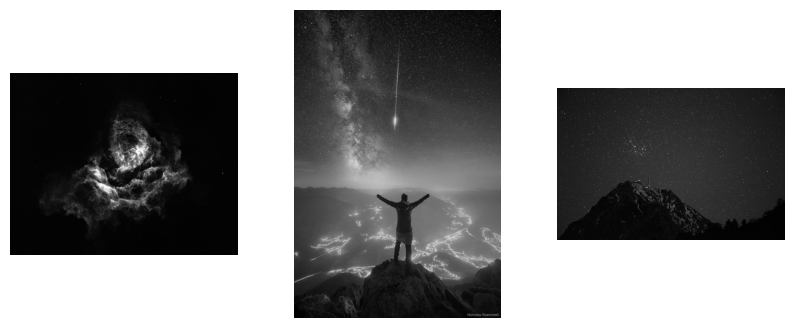

In [3]:
rgb2gray_weights = np.array([0.299 , 0.587 , 0.114])

paths = ['./Crew_7_Nebula_Seeley-1_1024.jpg',
         './MeteorMountain_Roemmelt_960.jpg',
         './_MG_4553_rawfile1024.jpg']

images = [plt.imread(path)[:,:,:3] for path in paths]
for i, image in enumerate(images):
    temp = np.sum(image.astype(float) * rgb2gray_weights[None, None, :], axis=-1)
    images[i] = np.round(temp).astype(np.uint8)

test_image = images[2]

fig, ax = plt.subplots(1,3, figsize=(10, 4))
for i, image in enumerate(images):
    ax[i].imshow(image, cmap='gray')
    ax[i].axis('off')
plt.show()

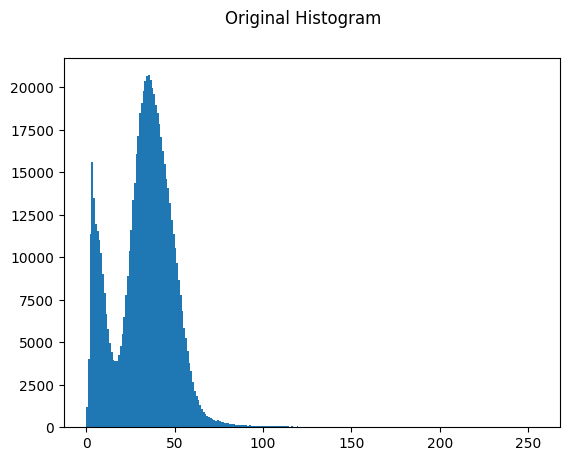

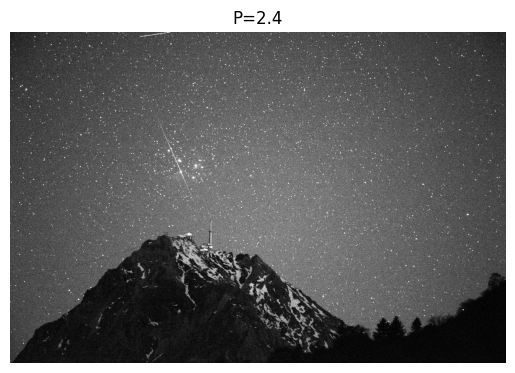

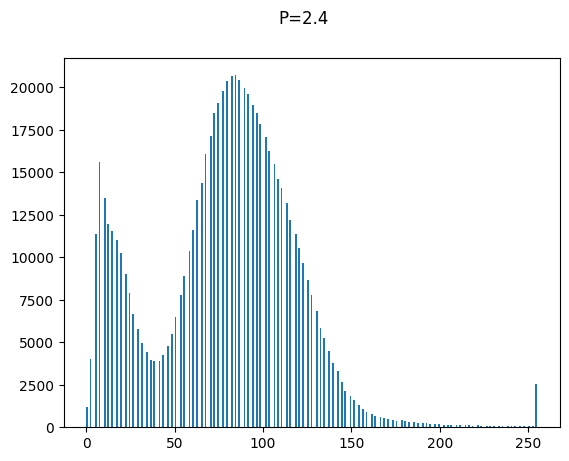

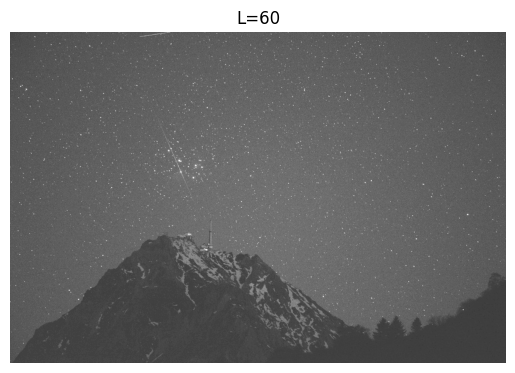

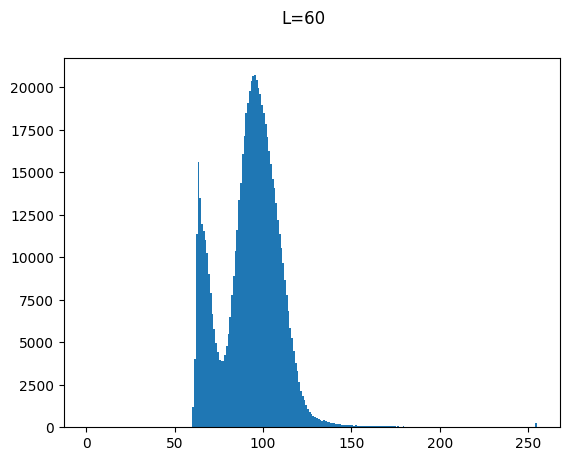

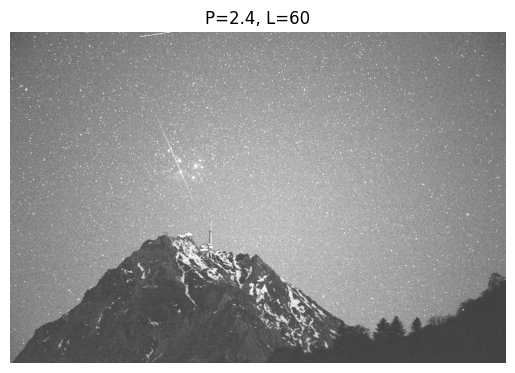

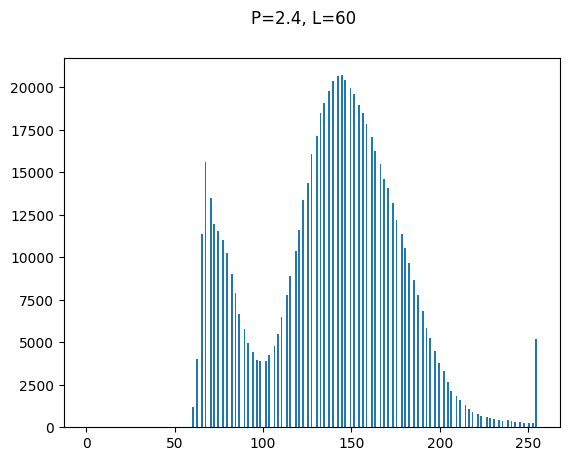

In [4]:
fig, ax = plot_histogram(test_image)
fig.suptitle("Original Histogram")
plt.show()

img = linear_point_operation(test_image, P=2.4)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.title("P=2.4")
plt.show()
fig, ax = plot_histogram(img)
fig.suptitle("P=2.4")
plt.show()

img = linear_point_operation(test_image, L=60)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.title('L=60')
plt.show()
fig, ax = plot_histogram(linear_point_operation(test_image, L=60))
fig.suptitle("L=60")
plt.show()

img = linear_point_operation(test_image, P=2.4, L=60)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.title('P=2.4, L=60')
plt.show()
fig, ax = plot_histogram(img)
fig.suptitle("P=2.4, L=60")
plt.show()

## Subpart-2

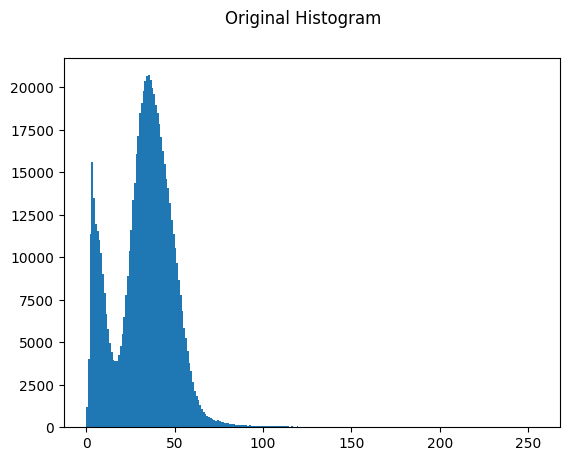

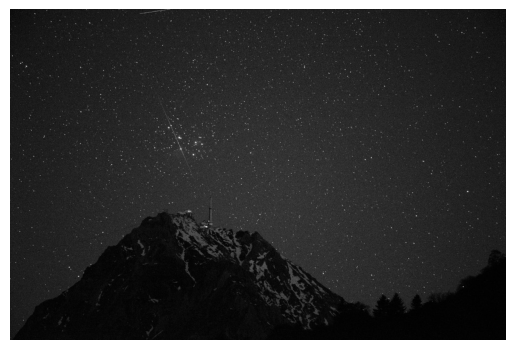

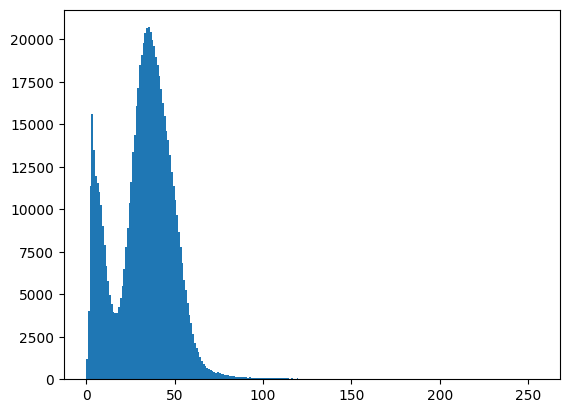

In [5]:
def FSCS(image: np.ndarray):
    image = image.copy().astype(float)
    image -= image.min()
    image *= 255/image.max()
    return np.round(image).astype(np.uint8)


fig, ax = plot_histogram(test_image)
fig.suptitle("Original Histogram")
plt.show()

img = FSCS(test_image)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.show()
fig, ax = plot_histogram(img)
plt.show()

## Subpart-3


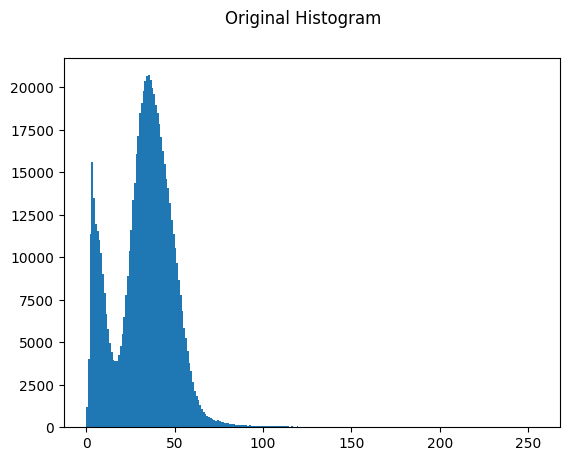

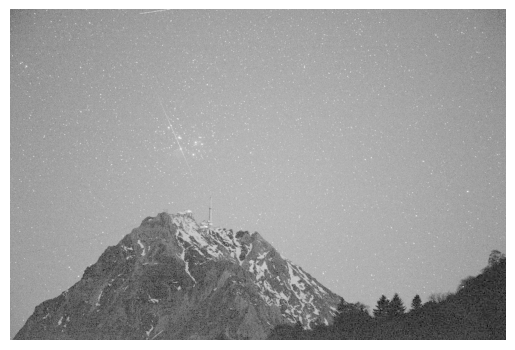

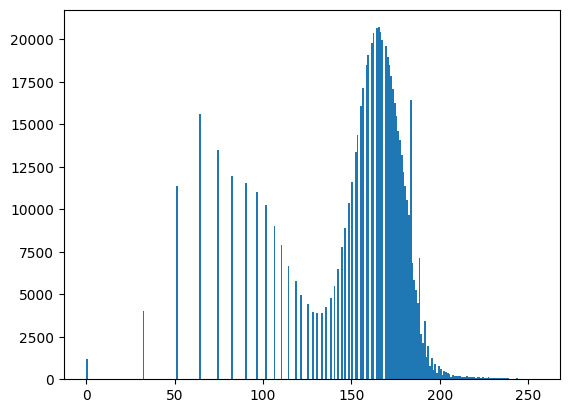

In [6]:
test_image_log = np.log2(test_image + 1)

fig, ax = plot_histogram(test_image)
fig.suptitle("Original Histogram")
plt.show()

img = FSCS(test_image_log)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.show()
fig, ax = plot_histogram(img)
plt.show()

## Subpart-4

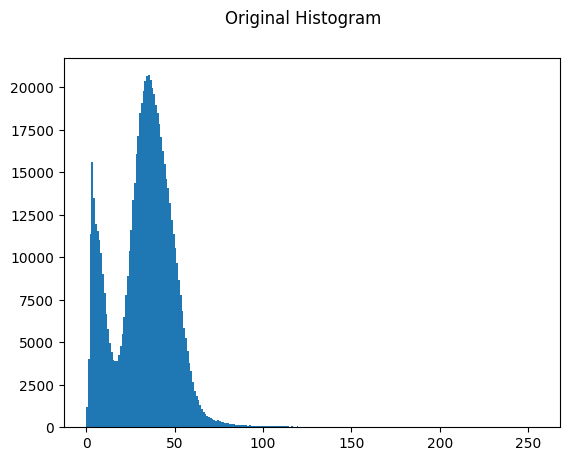

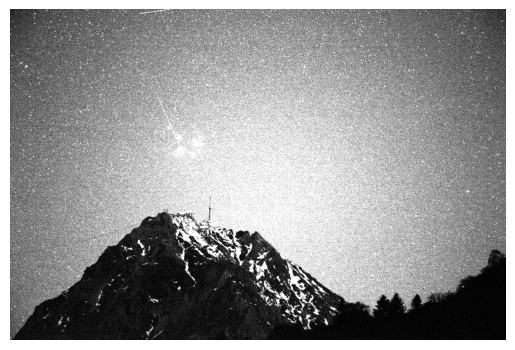

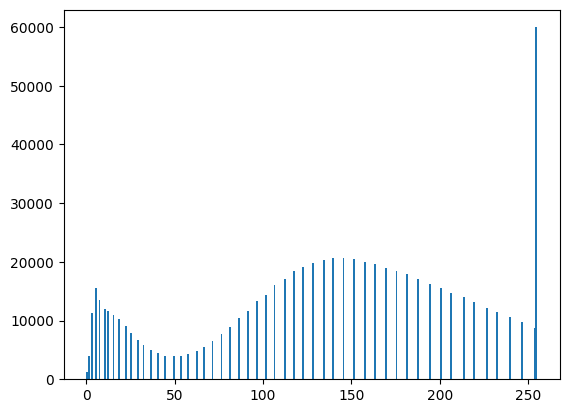

In [7]:
def gamma_correction(image, gamma=1.4):
    image = np.round(np.power(image, gamma))
    image[image>255] = 255
    return image.astype(np.uint8)
    

fig, ax = plot_histogram(test_image)
fig.suptitle("Original Histogram")
plt.show()

img = gamma_correction(test_image)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.show()
fig, ax = plot_histogram(img)
plt.show()

## Subpart-5

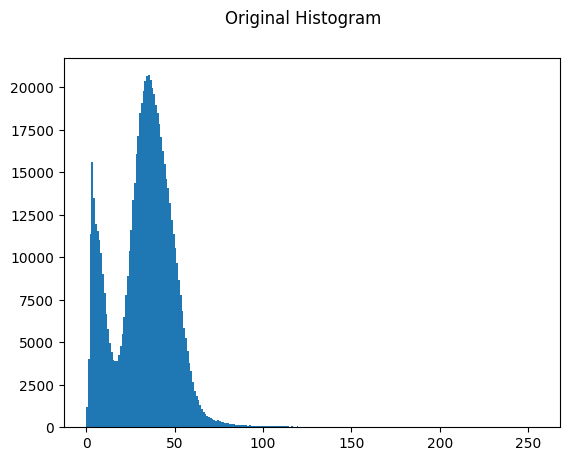

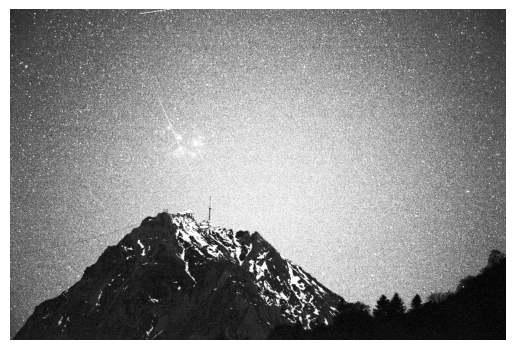

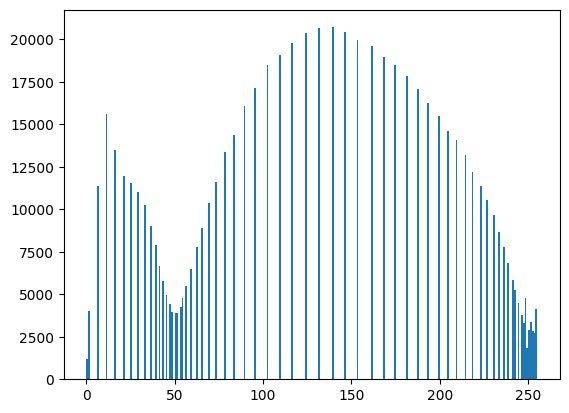

In [8]:
def histogram_flattening(image):
    values, counts = np.unique(image, return_counts=True)
    cdf = np.zeros(256, dtype=float)
    for v, c in zip(values, counts):
        cdf[v] = c
    cdf /= image.size
    cdf = np.cumsum(cdf)

    flattened_image = np.zeros_like(image, dtype=float)
    
    # trick to use numpy vectorization rather than
    # having 2 loops
    where = np.where(image > -1)
    flattened_image[where] = cdf[image[where]]

    return FSCS(flattened_image)


fig, ax = plot_histogram(test_image)
fig.suptitle("Original Histogram")
plt.show()

img = histogram_flattening(test_image)
plt.imshow(img, vmin=0, vmax=255, cmap='gray')
plt.axis('off')
plt.show()
fig, ax = plot_histogram(img)
plt.show()

Original Images


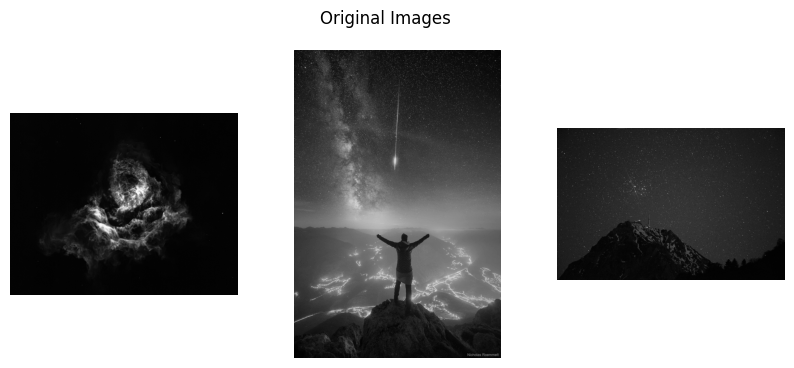

Linear Point Operation


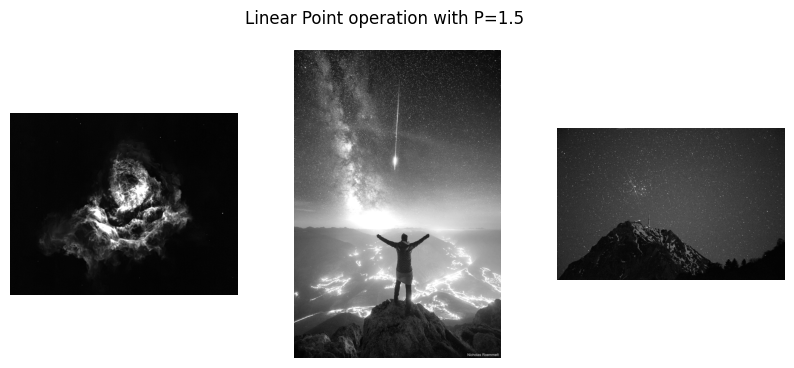

Full Scale Contrast Strech


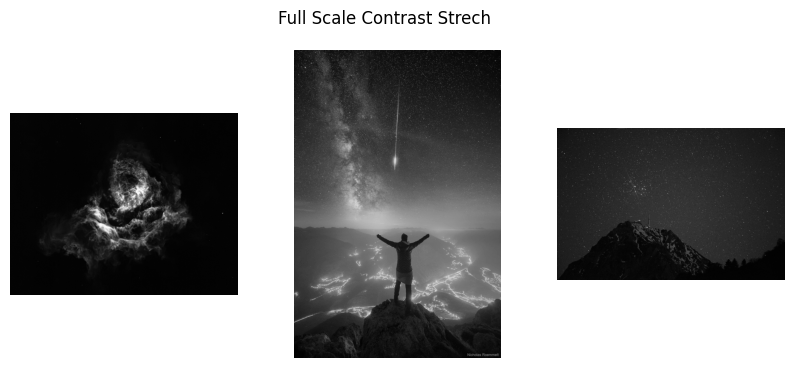

Log Magnitude


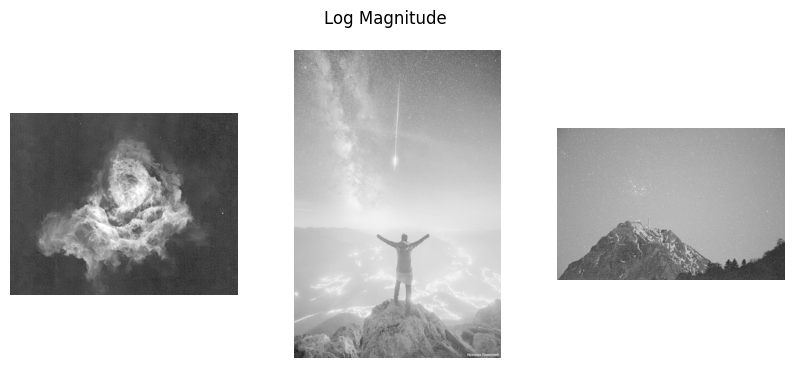

Gamma Correction


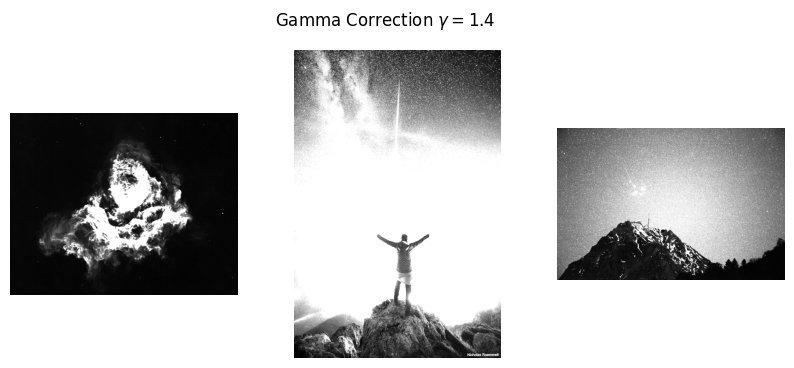

Histogram Flattening


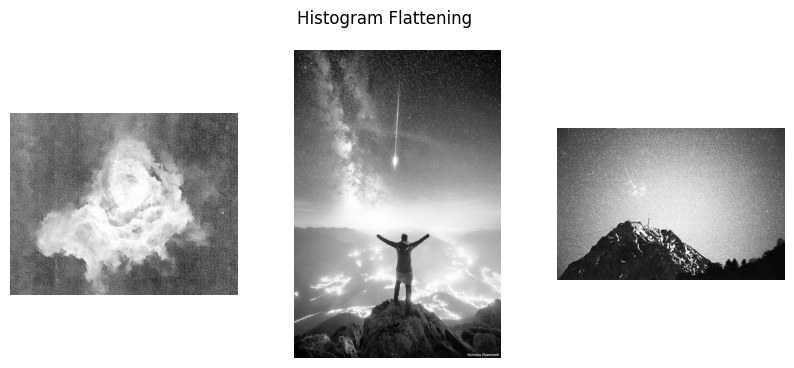

In [9]:
def display_3_images(images, title):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray', vmin=0, vmax=255)
        ax[i].axis('off')
    fig.suptitle(title)
    return fig, ax

# Original Images
print('Original Images')
display_3_images(images, "Original Images")
plt.show()


# linear point operation
print('Linear Point Operation')
new_images = [linear_point_operation(img, P=1.5) for img in images]
display_3_images(new_images, "Linear Point operation with P=1.5")
plt.show()

# Full Scale Contrast Stretch
print('Full Scale Contrast Strech')
new_images = [FSCS(img) for img in images]
display_3_images(new_images, "Full Scale Contrast Strech")
plt.show()

# Log Magnitude
print('Log Magnitude')
new_images = [FSCS(np.log2(1+img.astype(float))) for img in images]
display_3_images(new_images, "Log Magnitude")
plt.show()

# Gamma Correction
print('Gamma Correction')
new_images = [gamma_correction(img) for img in images]
display_3_images(new_images, "Gamma Correction $\gamma=1.4$")
plt.show()

# Histogram Flattening
print('Histogram Flattening')
new_images = [histogram_flattening(img) for img in images]
display_3_images(new_images, "Histogram Flattening")
plt.show()


In the above images, the quality of the image is dependent on the application being considered.
1. FSCS operated images is almost same as the original images because the original images already span nearly the entire domain.
2. The first image looks a little better with log magnitude and histogram flattening because we can observe some more gas clouds that are visually hidden in the original image
3. The third image looks visually very different, in gray scale it looks like a day-night difference. It's not necessarily "better" but definitely if the application is to transform the image in such a way.
4. Gamma Correction is bad is almost every case because too many pixels are being mapped to the highest intensity.

# Question-2

In [10]:
np.where(test_image>-1)

(array([  0,   0,   0, ..., 682, 682, 682]),
 array([   0,    1,    2, ..., 1021, 1022, 1023]))

In [11]:
a = np.ones((4,5))
np.r_[a, np.zeros(5)[None, :]]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0.]])

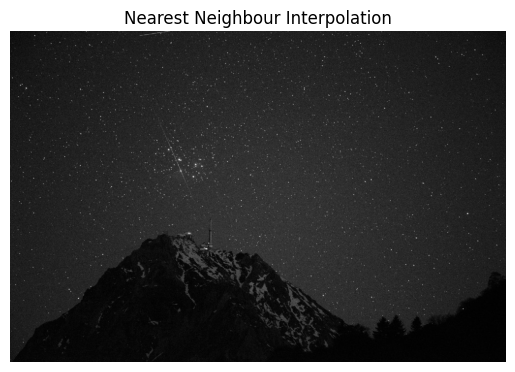

100%|██████████| 1024/1024 [00:02<00:00, 416.37it/s]


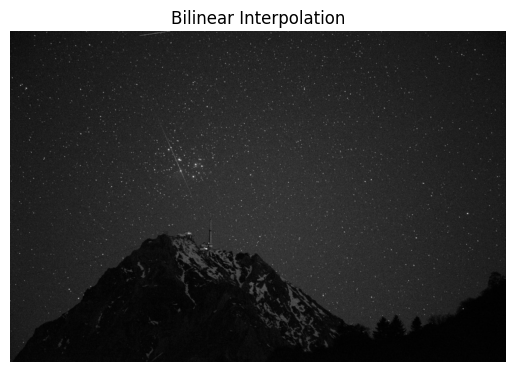

In [12]:
from tqdm import tqdm

class Image_Zoom:
    def __init__(self, mode='nearest_neighbour'):
        self.mode = mode
    
    def transform(self, image, factor):
        if self.mode == 'nearest_neighbour':
            return self.nearest_neighbor(image, factor)
        else:
            return self.bilinear(image, factor)
    
    @classmethod
    def scale(cls, image, factor):
        n, m = image.shape
        n *= factor
        m *= factor
        image = np.zeros((int(n), int(m)), dtype=image.dtype)
        return image
        
    @classmethod
    def nearest_neighbor(cls, image, factor):
        res = cls.scale(image, factor)
        
        # trick to avoid nested for loops
        where = np.where(res > -1)
        where_nearest = tuple([np.round(where[0]/factor).astype(int),
                         np.round(where[1]/factor).astype(int)])
        res[where] = image[where_nearest]
        return res
    
    @classmethod
    def bilinear(cls, image, factor):
        """
        Source: https://en.wikipedia.org/wiki/Bilinear_interpolation
        An easier to work with formula is given in the above link
        I've used that
        """
        res = cls.scale(image, factor)
        image = image.copy()
        
        # to deal with edge case
        image = np.r_[image, np.zeros(image.shape[1])[None, :]]
        image = np.c_[image, np.zeros(image.shape[0])[:, None]]
        
        for i in tqdm(range(res.shape[0])):
            for j in range(res.shape[1]):
                xf, yf = i/factor, j/factor
                x, y = int(xf), int(yf)
                dx, dy = xf - x, yf - y
                res[i, j] = (
                    dx*dy*image[x+1, y+1] +
                    (1-dx)*dy*image[x, y+1] +
                    dx*(1-dy)*image[x+1, y] +
                    (1-dx)*(1-dy)*image[x, y]
                )
        return res

zoom_nn = Image_Zoom(mode="nearest_neighbour")
img = zoom_nn.transform(test_image, factor=1.5)
plt.imshow(img, cmap='gray')
plt.title('Nearest Neighbour Interpolation')
plt.axis('off')
plt.show()

zoom_bi = Image_Zoom(mode="bilinear")
img = zoom_bi.transform(test_image, factor=1.5)
plt.imshow(img, cmap='gray')
plt.title('Bilinear Interpolation')
plt.axis('off')
plt.show()


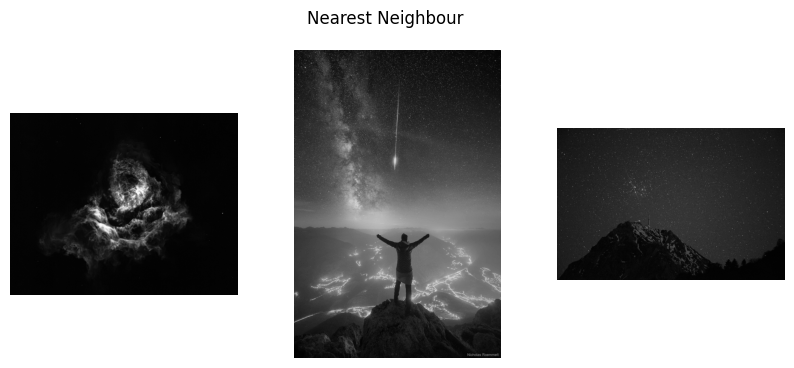

100%|██████████| 1024/1024 [00:02<00:00, 403.55it/s]


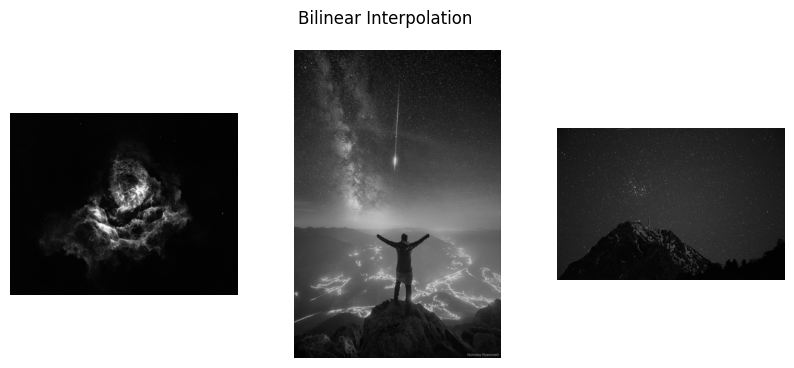

In [13]:
zoom_nn = Image_Zoom(mode="nearest_neighbour")
zoom_bi = Image_Zoom(mode="bilinear")

new_images = [zoom_nn.transform(img, factor=1.5) for img in images]
display_3_images(new_images, title='Nearest Neighbour')
plt.show()

new_images = [zoom_bi.transform(img, factor=1.5) for img in images]
display_3_images(new_images, title='Bilinear Interpolation')
plt.show()

There is no apparent difference in the quality of the two techniques

The speed of my nearest neighbour interpolation is much higher than bilinear interpolation due to vectorized implementation. In terms of the time complexity of the two algorithms however bilinear interpolation should be slower because of higher number of flops. The exact speedup is hard to say because two operations that both constitute a flop can take different amount of time.

# Question-3

In [14]:

images = [plt.imread('./7.1.02.tiff'),
          plt.imread('./7.1.03.tiff'),
          plt.imread('./7.1.04.tiff')]

## Implementation-1

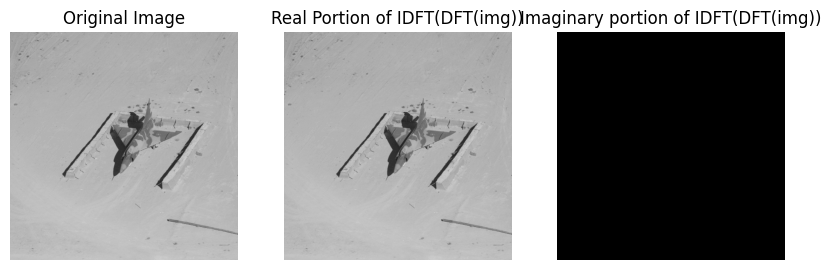

In [15]:
def DFT(image):
    """
    The first summation gives
    tilde I(u, v) = sum_i I(i, j) W^(ui)
    
    The second summation sums the previous result
    over j after multiplying with W^(vj)
    """
    n, m = image.shape
    res = np.zeros_like(image, dtype=complex)
    image = image.astype(complex)
    for u in range(n):
        for i in range(n):
            res[u, :] += (image[i, :] *
                          np.exp(-2j * np.pi * (u*i)/n )
                         )
    dft = np.zeros_like(image)
    for v in range(m):
        for j in range(m):
            dft[:, v] += (res[:, j] *
                          np.exp(-2j * np.pi * (v*j/m))
                         )
    return dft


def IDFT(dft):
    n, m = dft.shape
    res = np.zeros_like(dft, dtype=complex)
    for i in range(n):
        for u in range(n):
            res[i, :] += (dft[u, :] *
                          np.exp(2j * np.pi * (u*i)/n )
                         ) / n
    img = np.zeros_like(dft)
    for j in range(m):
        for v in range(m):
            img[:, j] += (res[:, v] *
                          np.exp(2j * np.pi * (v*j/m))
                         ) / m
    return img


temp_img = IDFT(DFT(images[0]))
fig, ax = display_3_images([images[0], temp_img.real, temp_img.imag], title='')
ax[0].set_title('Original Image')
ax[1].set_title('Real Portion of IDFT(DFT(img))')
ax[2].set_title('Imaginary portion of IDFT(DFT(img))')
plt.show()


## Implementation-2

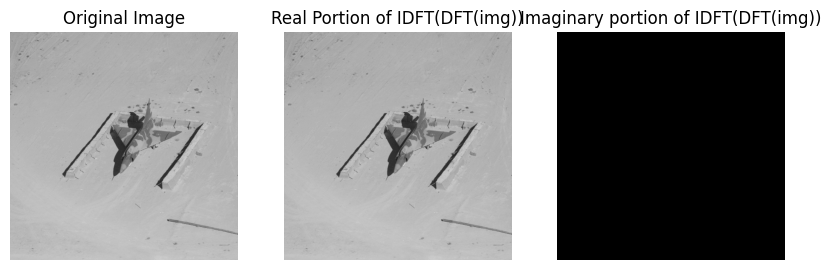

In [16]:
def matrix_DFT(image):
    n, m = image.shape
    w1, w2 = np.exp(-2j * np.pi / n), np.exp(-2j * np.pi / m)
    r1, r2 = np.power(w1, np.arange(n)), np.power(w2, np.arange(m))
    W1, W2 = np.r_[[r1]*n].T, np.r_[[r2]*m].T
    W1, W2 = np.power(W1, np.arange(n)), np.power(W2, np.arange(m))
    return W1 @ image @ W2


def matrix_IDFT(dft):
    n, m = dft.shape
    w1, w2 = np.exp(2j * np.pi / n), np.exp(2j * np.pi / m)
    r1, r2 = np.power(w1, np.arange(n)), np.power(w2, np.arange(m))
    W1, W2 = np.r_[[r1]*n].T, np.r_[[r2]*m].T
    W1, W2 = np.power(W1, np.arange(n))/n, np.power(W2, np.arange(m))/m
    return W1 @ dft @ W2

    
temp_img = matrix_IDFT(matrix_DFT(images[0]))
fig, ax = display_3_images([images[0], temp_img.real, temp_img.imag], title='')
ax[0].set_title('Original Image')
ax[1].set_title('Real Portion of IDFT(DFT(img))')
ax[2].set_title('Imaginary portion of IDFT(DFT(img))')
plt.show()


## Subpart-1

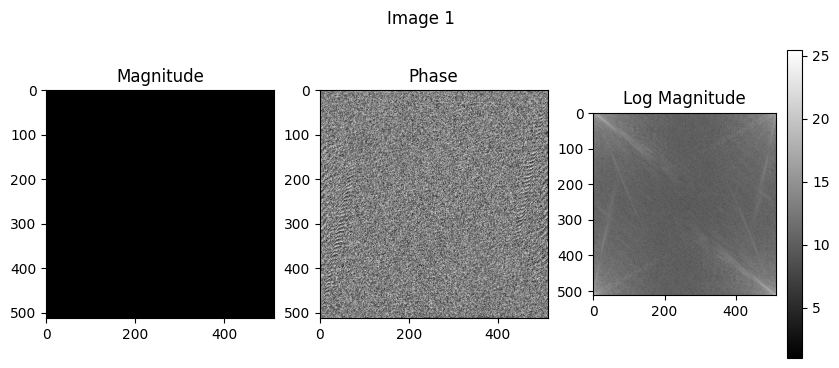

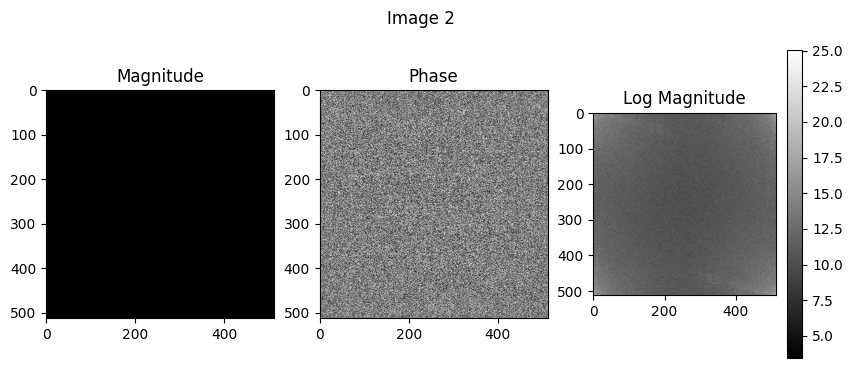

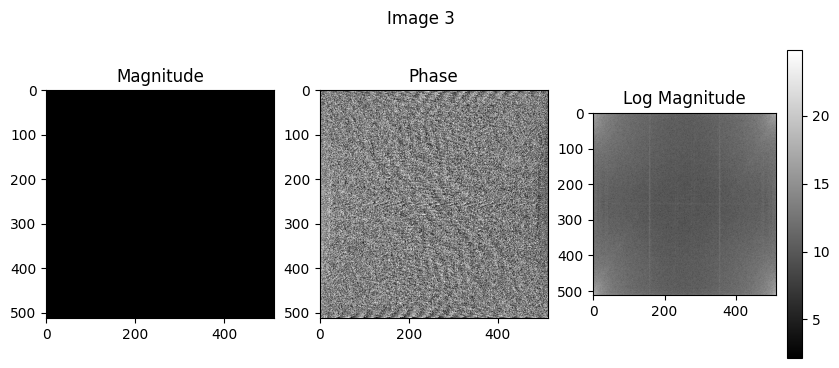

In [17]:
dfts = [matrix_DFT(image) for image in images]
dfts_magnitude = [np.abs(dft) for dft in dfts]
dfts_phase = [np.angle(dft) for dft in dfts]
dfts_log_magnitude = [np.log2(dft_mag) for dft_mag in dfts_magnitude]

for i in range(3):
    fig, ax = plt.subplots(1, 3, figsize=(10,4))
    ax[0].imshow(dfts_magnitude[i], cmap='gray')
    ax[1].imshow(dfts_phase[i], cmap='gray')
    t = ax[2].imshow(dfts_log_magnitude[i], cmap='gray')
    plt.colorbar(t)
    ax[0].set_title('Magnitude')
    ax[1].set_title('Phase')
    ax[2].set_title('Log Magnitude')
    fig.suptitle(f'Image {i+1}')
    plt.show()



## Subpart-2

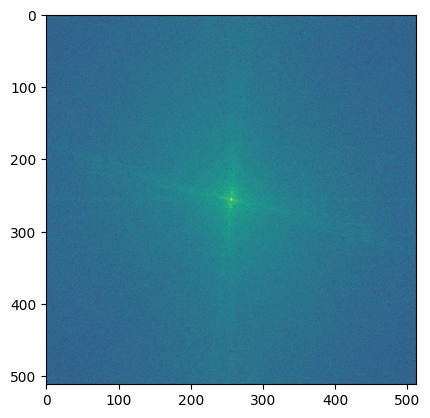

In [18]:
from matplotlib.colors import LogNorm
a = np.fft.fftshift(np.fft.fft2(images[1]))
plt.imshow(np.abs(a), norm=LogNorm())
plt.show()


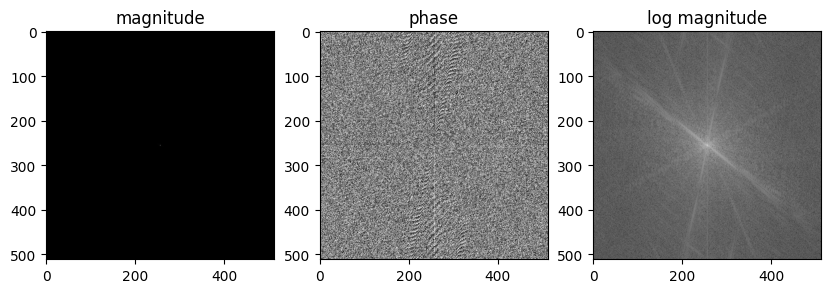

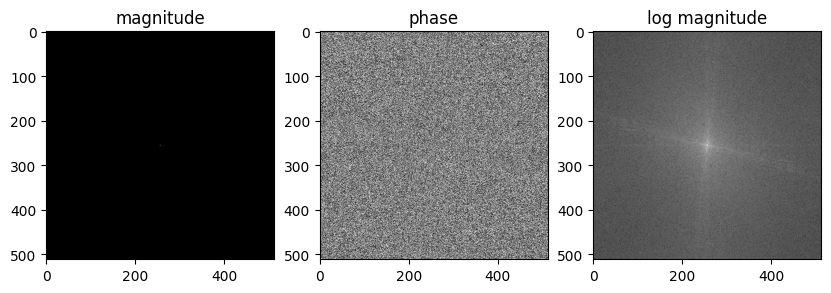

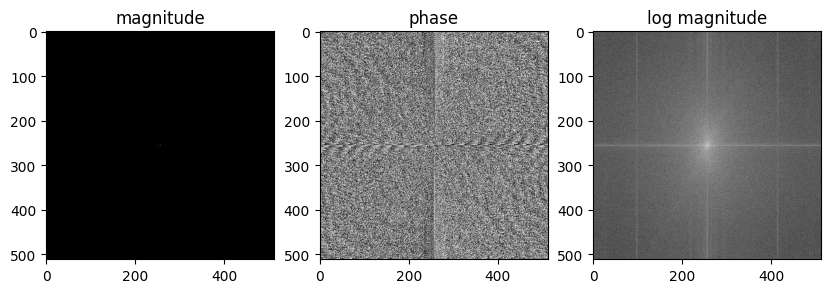

In [19]:
def centered_DFT(image):
    image = image.astype(complex)
    n, m = image.shape
    r = np.arange(m)
    c = np.arange(n)
    mat = c[:, None] + r[None, :]
    p = np.power(-1, mat)
    image *= p
    return matrix_DFT(image)

for image in images:
    dft = centered_DFT(image)
    mag = np.abs(dft)
    phase = np.angle(dft)
    log_mag = FSCS(np.log2(1 + mag))
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    ax[0].imshow(mag, cmap='gray')
    ax[1].imshow(phase, cmap='gray')
    ax[2].imshow(log_mag, cmap='gray')
    ax[0].set_title('magnitude')
    ax[1].set_title('phase')
    ax[2].set_title('log magnitude')
    plt.show()    

## Subpart-3

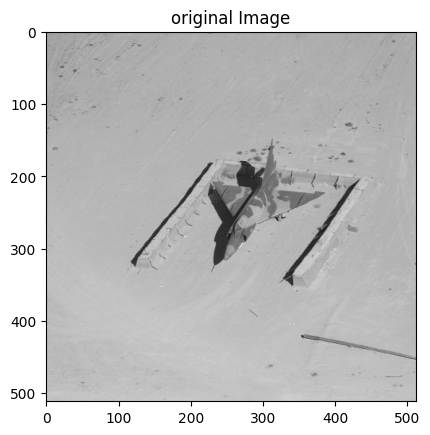

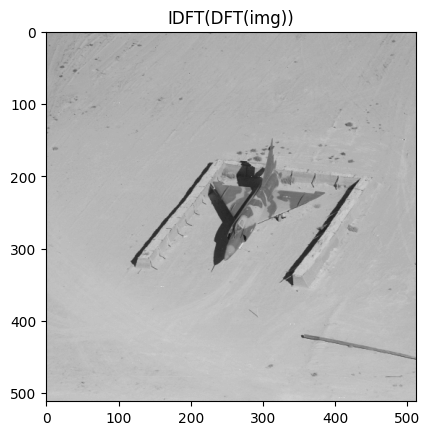

The values in the imaginary axis are non-zero because of floating point precision. But those values are very small, the absolute maximum value is 3.182040408944431e-09


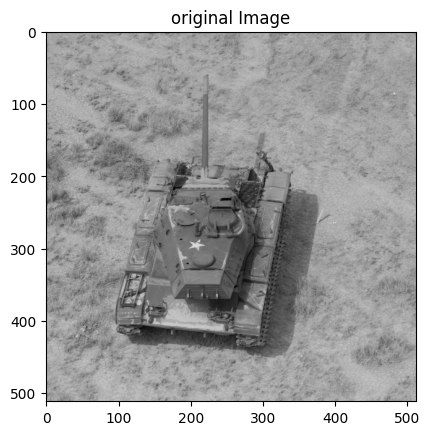

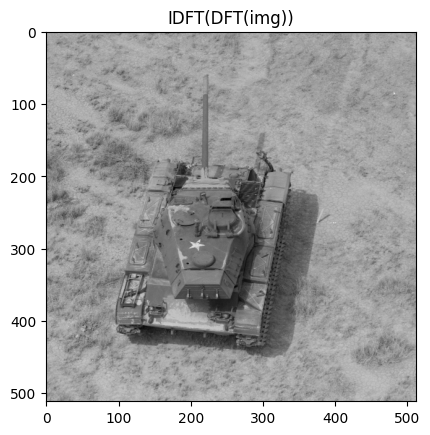

The values in the imaginary axis are non-zero because of floating point precision. But those values are very small, the absolute maximum value is 2.469041637809255e-09


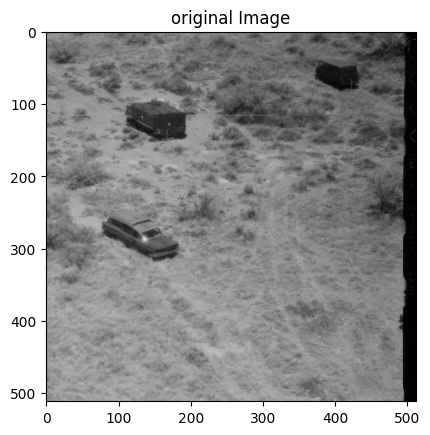

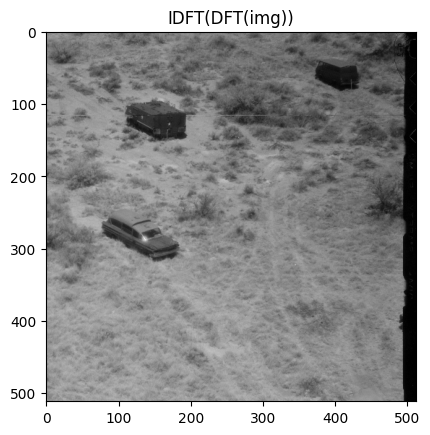

The values in the imaginary axis are non-zero because of floating point precision. But those values are very small, the absolute maximum value is 2.4236612716777017e-09


In [20]:
for test_image in images:
    temp = matrix_IDFT(matrix_DFT(test_image))
    plt.imshow(test_image, cmap='gray')
    plt.title('original Image')
    plt.show()

    plt.imshow(temp.real, cmap='gray')
    plt.title('IDFT(DFT(img))')
    plt.show()

    print(f'The values in the imaginary axis are non-zero because of floating point precision. But those values are very small, the absolute maximum value is {np.abs(temp.imag).max()}')

## Subpart-4

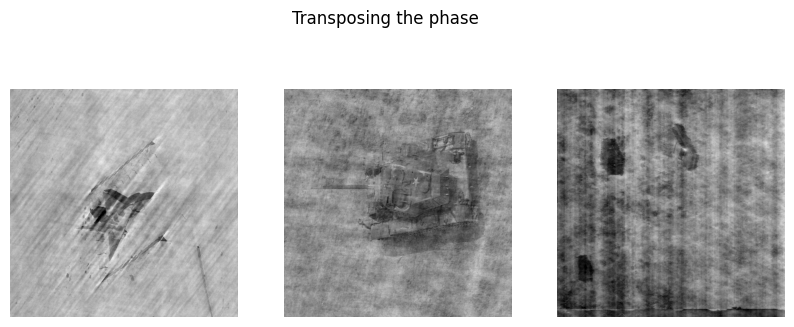

In [21]:
idfts = []
for image in images:
    minimum = min(image.shape)
    image = image[:minimum, :minimum]
    dft = matrix_DFT(image)
    phase = np.angle(dft).T
    mag = np.abs(dft)
    dft_new = mag * (np.cos(phase) + np.sin(phase)*1j)
    idfts.append(matrix_IDFT(dft_new))

display_3_images([img.real for img in idfts], title='Transposing the phase')
plt.show()
    

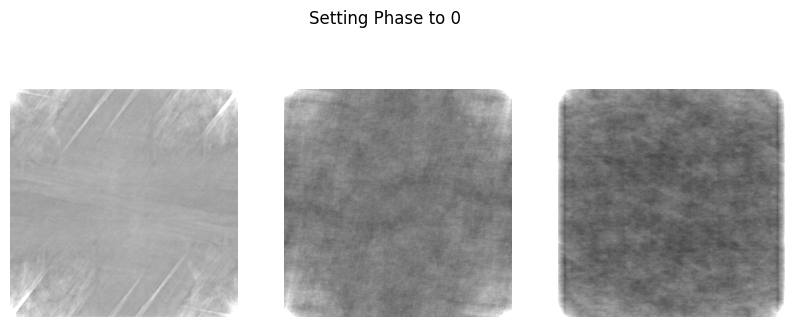

In [22]:
idfts = []
for image in images:
    dft = matrix_DFT(image)
    mag = np.abs(dft)
    dft_new = mag
    idfts.append(matrix_IDFT(dft_new))

display_3_images([img.real for img in idfts], title='Setting Phase to 0')
plt.show()
    

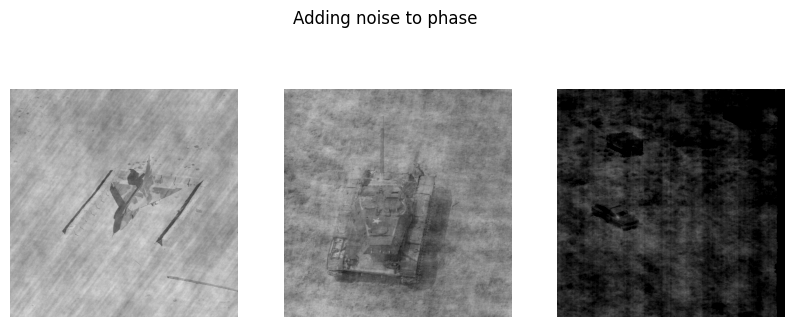

In [23]:
idfts = []
for image in images:
    dft = matrix_DFT(image)
    phase = np.angle(dft)
    phase += np.random.normal(0, scale=0.9, size=phase.shape)
    mag = np.abs(dft)
    dft_new = mag * (np.cos(phase) + 1j * np.sin(phase))
    idfts.append(matrix_IDFT(dft_new))

display_3_images([img.real for img in idfts], title='Adding noise to phase')
plt.show()
    